# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets\\Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

In [3]:
# Number of unique job titles
ujobs = df['job_title'].unique()
print(f'There are {len(ujobs)} unique jobs')

There are 93 unique jobs


In [4]:
# Average salary per year
avesalary = df.groupby('work_year')['salary_in_usd'].mean()
print(
    f"The average salary in 2020 was ${92302.631579:,.2f}.\n"
    f"The average salary in 2021 was ${94087.208696:,.2f}.\n"
    f"The average salary in 2022 was ${133379.510804:,.2f}.\n"
    f"The average salary in 2023 was ${148954.558413:,.2f}."
)
avesalary

The average salary in 2020 was $92,302.63.
The average salary in 2021 was $94,087.21.
The average salary in 2022 was $133,379.51.
The average salary in 2023 was $148,954.56.


work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

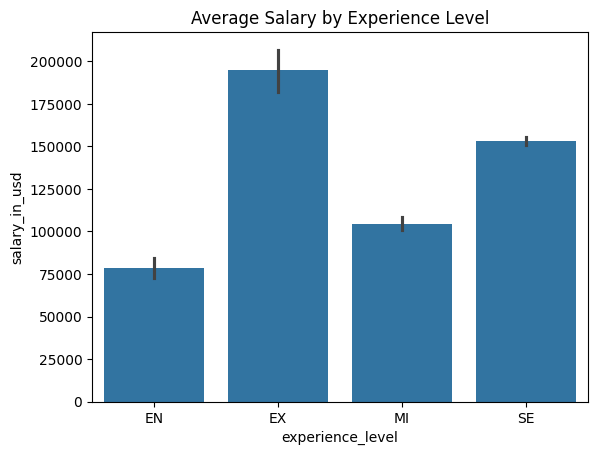

In [5]:
# Bar plot for experience level
sns.barplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Average Salary by Experience Level')
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [6]:
# Encode experience_level, employment_type, company_size
le_exp = LabelEncoder()
le_emp = LabelEncoder()
le_company = LabelEncoder()

df['experience_level_encoded'] = le_exp.fit_transform(df['experience_level'])
df['employment_type_encoded'] = le_emp.fit_transform(df['employment_type'])
df['company_size_encoded'] = le_company.fit_transform(df['company_size'])

# Choose your features
features = ['work_year', 'experience_level_encoded', 
            'employment_type_encoded', 'company_size_encoded']

X = df[features]
y = df['salary_in_usd']

# But remember: too many categories can hurt performance

X.head()

,work_year,experience_level_encoded,employment_type_encoded,company_size_encoded
0,2023,0,2,0
1,2023,0,2,0
2,2023,0,2,0
3,2023,0,2,0
4,2023,0,2,0


## 📈 Part 4: Train a Linear Regression Model

In [7]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59152.96


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [8]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

print("Experience Level Encoding:", le_exp.classes_)
print("Employment Type Encoding:", le_emp.classes_)
print("Company Size Encoding:", le_company.classes_)


future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': le_exp.transform(['EN', 'MI', 'SE', 'EX']),
    'employment_type_encoded': le_emp.transform(['FT', 'FT', 'FT', 'FT']),
    'company_size_encoded': le_company.transform(['M', 'M', 'M', 'M'])
})


# Predict
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid-Level', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries.round(2)
})

results

Experience Level Encoding: ['EN' 'EX' 'MI' 'SE']
Employment Type Encoding: ['CT' 'FL' 'FT' 'PT']
Company Size Encoding: ['L' 'M' 'S']


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111702.91
1,Mid-Level,152468.46
2,Senior,172851.23
3,Executive,132085.69


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h2>Part 6: Reflection</h2>

<h3>1. Does your model make reasonable predictions? Why or why not?</h3>
<p>
Yes, the model shows a reasonable pattern because salaries increase as experience level increases, which matches what usually happens in real life. 
However, the predictions are not very accurate because the model only uses a few pieces of information. 
Salary can be affected by many other factors, so with limited data, the model can only show a general trend and not exact values.
</p>

<h3>2. What are the limitations of using only <code>work_year</code> and <code>experience_level</code>?</h3>
<p>
Using only those two variables leaves out many other important influences. 
Salary can also depend on job title, company size, location, and employment type. 
Because these were not included, the model becomes too simple and cannot clearly show why some salaries are higher than others.
</p>

<h3>3. How could you improve this model?</h3>
<p>
To improve the model, I would include more relevant variables such as job role, company size, and work location. 
Adding more features would give the model more information to understand what affects salary, which can help produce more meaningful and accurate predictions.
</p>

<h3>4. Why is R² not enough to trust your predictions?</h3>
<p>
R² only tells us how well the model matches the data it was trained on. 
Even if the R² value is high, the model might still give poor results when used on new data. 
This means we cannot rely on R² alone, and we must also check how the model performs when making actual predictions.
</p

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀